
#In this project we are detect mask using Keras (Deep learning) TensorFlow library.

## In this project we are using this dataset [Here](https://github.com/prajnasb/observations/tree/master/experiements).

In [8]:
 #mounting google drive
from google.colab import drive
drive.mount('/content/gdrive')  

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [9]:
#importing dependencies
import cv2                       
import os

In [10]:
count=0
dir='/content/gdrive/My Drive/observations-master/experiements/dest_folder/train'
for items in os.listdir(dir):               #getting the total number of files in the training directory
  for item in os.listdir(os.path.join(dir,items)):
     count=count+1
  print("There are ",count," files in training",items)
  count=0

dir='/content/gdrive/My Drive/observations-master/experiements/dest_folder/val'
for items in os.listdir(dir):               #getting the total number of files in the test directory
  for item in os.listdir(os.path.join(dir,items)):
     count=count+1
  print("There are ",count," files in validation",items)
  count=0


There are  658  files in training with_mask
There are  657  files in training without_mask
There are  71  files in validation without_mask
There are  71  files in validation with_mask


In [11]:
categories=os.listdir(dir)
label_pics=[i for i in range(len(categories))]  #creating a label dictionary for future references
label=dict(zip(label_pics,categories))
label

{0: 'without_mask', 1: 'with_mask'}

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_data='/content/gdrive/My Drive/observations-master/experiements/dest_folder/train'
val_data='/content/gdrive/My Drive/observations-master/experiements/dest_folder/val'
train_datagen=ImageDataGenerator(rescale=1.0/255,      #getting and augmenting our training data for better accuracy
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')                                  

val_datagen=ImageDataGenerator(rescale=1.0/255)

train_generator=train_datagen.flow_from_directory(train_data,    
                                                  batch_size=20,
                                                  class_mode='categorical',
                                                  target_size=(300,300))
val_generator=val_datagen.flow_from_directory(val_data,           #getting our testing data along with folder and subfolder names
                                                batch_size=20,
                                                class_mode='categorical',
                                                target_size=(300,300))

Found 1315 images belonging to 2 classes.
Found 142 images belonging to 2 classes.


In [13]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

In [14]:
model=Sequential([
        Conv2D(32,(3,3),activation='relu',input_shape=(300,300,3)),  #Conv Layer 1
        MaxPooling2D(2,2),                                           #MaxPooling layer 1

        Conv2D(64,(3,3),activation='relu'),                          #Conv Layer 2         
        MaxPooling2D(2,2),                                           #MaxPooling Layer 2

        Conv2D(128,(3,3),activation='relu'),                          #Conv Layer 3
        MaxPooling2D(2,2),                                           #MaxPooling layer 3

        Conv2D(256,(3,3),activation='relu'),                         #Conv layer 4
        MaxPooling2D(2,2),                                           #MaxPooling layer 4  

        Flatten(),                                                   #First fully Connected Layer      
        Dropout(0.3),                                                #30% Dropout
        
        Dense(128,activation='relu'),                                #Second fully Connected Layer 
        Dense(2,activation='softmax')                                #2 Feature-Output layer      
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 256)       2

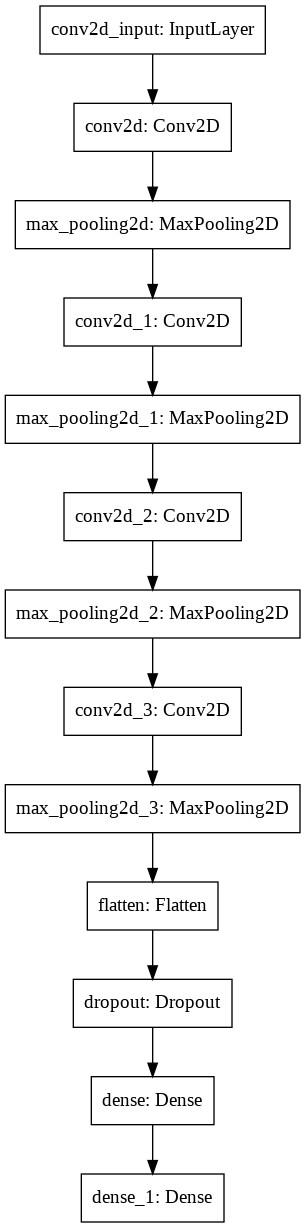

In [24]:
# Plot the Model
from keras.utils.vis_utils import plot_model
plot_model(model,to_file="fcae mask detection architecture.png")

In [16]:
#from tensorflow.keras.optimizers import RMSprop                      #used for tuning purposes only
model.compile(optimizer='adam',                                       #compiling model with these Hyperparameters
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#Training starts

In [17]:
history=model.fit(train_generator,validation_data=val_generator,  
                  epochs=10,
                  validation_steps=10,
                  verbose=1
                  )

Epoch 1/10
66/66 [==============================] - 850s 13s/step - loss: 0.6514 - accuracy: 0.6510 - val_loss: 0.2247 - val_accuracy: 0.9437
Epoch 2/10
66/66 [==============================] - 38s 573ms/step - loss: 0.3092 - accuracy: 0.8844
Epoch 3/10
66/66 [==============================] - 37s 561ms/step - loss: 0.2735 - accuracy: 0.9072
Epoch 4/10
66/66 [==============================] - 37s 560ms/step - loss: 0.2402 - accuracy: 0.9034
Epoch 5/10
66/66 [==============================] - 37s 563ms/step - loss: 0.1961 - accuracy: 0.9240
Epoch 6/10
66/66 [==============================] - 37s 560ms/step - loss: 0.1822 - accuracy: 0.9262
Epoch 7/10
66/66 [==============================] - 37s 560ms/step - loss: 0.1615 - accuracy: 0.9392
Epoch 8/10
66/66 [==============================] - 37s 561ms/step - loss: 0.1392 - accuracy: 0.9468
Epoch 9/10
66/66 [==============================] - 38s 580ms/step - loss: 0.1305 - accuracy: 0.9521
Epoch 10/10
66/66 [==============================]

In [18]:
#saving our model
model.save('/content/gdrive/My Drive/mask_trained2.h5')          

In [19]:
 #evaluating our model based on the test data
eval=model.evaluate(train_generator)                           
print("Loss is : ",eval[0])
print("Accuracy is : ",eval[1])

66/66 [==============================] - 35s 536ms/step - loss: 0.1392 - accuracy: 0.9452
Loss is :  0.1391821801662445
Accuracy is :  0.9452471733093262


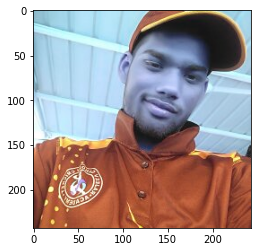

without_mask


In [20]:
import matplotlib.pyplot as plt
import numpy as np           
                              
face_img=cv2.imread('/content/gdrive/My Drive/gau.jpg')  #testing on random images 
plt.imshow(face_img)
plt.show()
res=cv2.resize(face_img,(300,300))                           #resizing as per our input size
nor=res/255.0
reshaped_final=np.reshape(nor,(1,300,300,3))                    #reshaping the image
result=model.predict(reshaped_final)                                   #gives us 2 probabilities that sum to 1
highest_pred=np.argmax(result,axis=1)[0]                             #getting the max of the two probabilities
print(label[highest_pred]) 

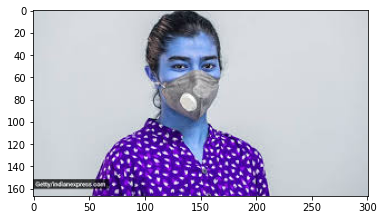

with_mask


In [21]:
import matplotlib.pyplot as plt
import numpy as np           
                              
face_img=cv2.imread('/content/gdrive/My Drive/with mask.jpg')  #testing on random images 
plt.imshow(face_img)
plt.show()
res=cv2.resize(face_img,(300,300))                           #resizing as per our input size
nor=res/255.0
reshaped_final=np.reshape(nor,(1,300,300,3))                    #reshaping the image
result=model.predict(reshaped_final)                                   #gives us 2 probabilities that sum to 1
highest_pred=np.argmax(result,axis=1)[0]                             #getting the max of the two probabilities
print(label[highest_pred]) 

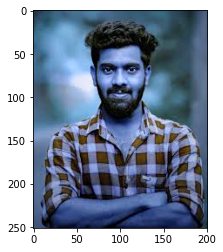

without_mask


In [22]:
import matplotlib.pyplot as plt
import numpy as np           
                              
face_img=cv2.imread('/content/gdrive/My Drive/without mask.jpg')  #testing on random images 
plt.imshow(face_img)
plt.show()
res=cv2.resize(face_img,(300,300))                           #resizing as per our input size
nor=res/255.0
reshaped_final=np.reshape(nor,(1,300,300,3))                    #reshaping the image
result=model.predict(reshaped_final)                                   #gives us 2 probabilities that sum to 1
highest_pred=np.argmax(result,axis=1)[0]                             #getting the max of the two probabilities
print(label[highest_pred]) 

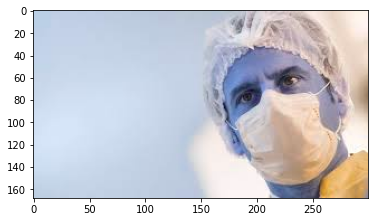

with_mask


In [23]:
import matplotlib.pyplot as plt
import numpy as np           
                              
face_img=cv2.imread('/content/gdrive/My Drive/with mask1.jpg')  #testing on random images 
plt.imshow(face_img)
plt.show()
res=cv2.resize(face_img,(300,300))                           #resizing as per our input size
nor=res/255.0
reshaped_final=np.reshape(nor,(1,300,300,3))                    #reshaping the image
result=model.predict(reshaped_final)                                   #gives us 2 probabilities that sum to 1
highest_pred=np.argmax(result,axis=1)[0]                             #getting the max of the two probabilities
print(label[highest_pred]) 